## Audio Classification

In [1]:
!pip install librosa

* librosa is a python package for music and audio analysis. It provides the building blocks necessary to create music information retrieval systems.

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
filename = 'UrbanSound8K/UrbanSound8K/dog_bark.wav'

In [4]:
# these are some preprocessing which will help us to display our sound wave:

import IPython.display as ipd #It helps us to display some graphs
import librosa
import librosa.display

In [5]:
!dir

 Volume in drive C is Windows
 Volume Serial Number is 5687-879C

 Directory of C:\Users\tanu\OneDrive\Desktop\Urban Sound Classification Project

27-04-2022  22:51    <DIR>          .
27-04-2022  13:07    <DIR>          ..
25-04-2022  13:22    <DIR>          .ipynb_checkpoints
27-04-2022  22:51         2,116,200 URBAN SOUND CLASSIFICATION - ANJALI CHOPRA.ipynb
25-04-2022  18:10             1,188 Urban Sound Classification Project - Shortcut.lnk
25-04-2022  13:13    <DIR>          UrbanSound8K
               2 File(s)      2,117,388 bytes
               4 Dir(s)  30,193,647,616 bytes free


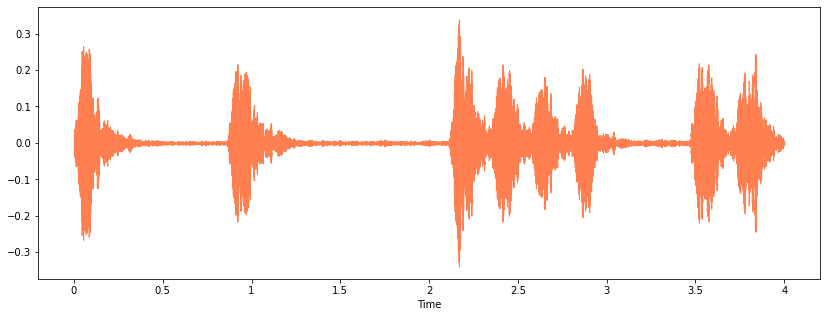

In [6]:
## Dog sound

plt.figure(figsize = (14,5))
data, sample_rate = librosa.load(filename) ## it gives us 2 things, one is data and other is sample rate
librosa.display.waveshow(data, sr = sample_rate, color = 'coral')
ipd.Audio(filename) #ipd.Audio : Audio will helps us to load the audio that is in the form of wave file and it by default reads
#the sample rate

In [7]:
# The sampling rate refers to the number of samples of audio recorded every second.

sample_rate #22 khz sampling rate

22050

In [8]:
# By default when we are reading with the help of librosa then we are reading these signals with the sample rate of 22050 khz

# It means whenever we are reading some dataset through librosa with respect to some specific audio we are actually getting
#the sample rate of 22050

#when we are reading this information through librosa than we are reading these signals with the sample rate of 22 khz and it
#simply means, through librosa we are reading the datset with respect to some specific audio and we are getting a 
#sample rate of 22050.

#we can read the audio via scipy lib as well

In [9]:
#Different audios has different sampling rates and there are two channels in an audio, one is : stereo and other is mono.
#when we read via librosa, it will try to normalize the entire dataset and it will give us the data wrt to a single sample rate

#### Using scipy

In [10]:
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio = wav.read(filename)

In [11]:
wave_sample_rate #44khz

44100

In [12]:
#so librosa  is bringing a mechanism probabaly it will just read an audio file and try to convert it 
#into a sample rate of 22050. As there are 2 channels one is mono and other is stereo which is basically related to 2 different 
#voices so librosa will try to convert those signals into a mono channel so librosa is very - 2 helpful in these kinds of 
#activities.

In [13]:
wave_audio  # in terms of scipy these wave signal values are not getting normalized

array([[ 233, 1268],
       [ 188, 1253],
       [ 161, 1235],
       ...,
       [-403,  291],
       [-414,  313],
       [-435,  326]], dtype=int16)

SOUND WAVE EXAMPLE

* Each and every signal can be represented by integer values or floating point values and that is what represented by wave_audio values.

* If we try to combine these values then it will be showing this kind of signals only or it will actually become a wave

* Any audio signals can be represented in the form of some particular numerical values

In [14]:
data  # when we use librosa it is getting normalized between -1 to 1

array([ 0.01670339,  0.02311585,  0.01839567, ..., -0.00195783,
       -0.00164373, -0.00170631], dtype=float32)

#### LIBROSA Vs SCIPY

* In terms of librosa, we are also getting some values (data) and wrt scipy these values (wave_audio) are not getting normalized but in case of librosa, these values are getting normalized between -1 to +1 so this is the advantage of using librosa and it is a library which is popularly used for audio signal processing because it helps us to do 2 things :

  * 1) It tries to converge signals and it actually makes only one signal i.e the mono one
       
  * 2) It can represent an audio signal wrt a normalized pattern between -1 to +1 so that a regular pattern is obseverd for        all the audios itself
       
  * 3) It is also able to see the sample rate and by default it converts the sample rate into 22khz as in wavfile we see 44khz    etc so as in wave file we will see different sample rate.


In [15]:
import pandas as pd

metadata = pd.read_csv('UrbanSound8K/UrbanSound8K/metadata/UrbanSound8K.csv')
metadata.head(10)  #this is a labelled dataset 



,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
5,100263-2-0-143.wav,100263,71.500000,75.500000,1,5,2,children_playing
6,100263-2-0-161.wav,100263,80.500000,84.500000,1,5,2,children_playing
7,100263-2-0-3.wav,100263,1.500000,5.500000,1,5,2,children_playing
8,100263-2-0-36.wav,100263,18.000000,22.000000,1,5,2,children_playing
9,100648-1-0-0.wav,100648,4.823402,5.471927,2,10,1,car_horn


In [16]:
#check whether the dataset is imbalanced:

metadata['class'].value_counts()

#It is not an imbalanced dataset as most of the categories are having good amount of data.

dog_bark            1000
children_playing    1000
air_conditioner     1000
street_music        1000
engine_idling       1000
jackhammer          1000
drilling            1000
siren                929
car_horn             429
gun_shot             374
Name: class, dtype: int64

In [17]:
#another example :


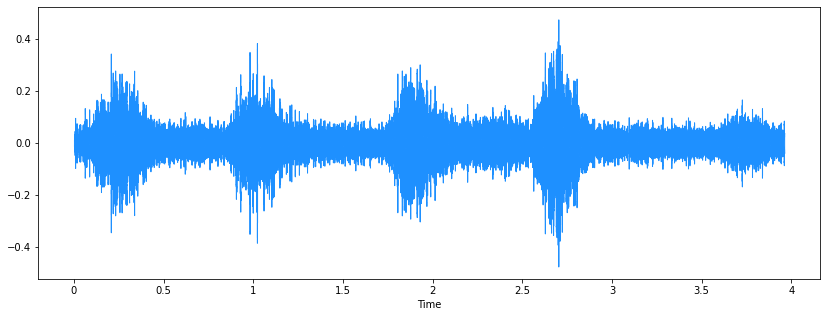

In [18]:
filename = 'UrbanSound8K/UrbanSound8K/19503-3-0-0.wav'
plt.figure(figsize = (14,5))
data, sample_rate = librosa.load(filename)
librosa.display.waveshow(data, sr = sample_rate, color = 'dodgerblue')
ipd.Audio(filename)

In [19]:
#meta data : It contains the mapping of the audio files wrt the folders and file names.

## Audio Classification Data Preprocessing

* whenever we read any audio signal, we usually get 2 channels. The audio may be recorded in mono channel or in streo channel itself and wrt some sample rates, eg 44khz and librosa lib will make sure that the sample rate, it will keep it in 21khz and the audio data , it will try to normalize it in b/w -1 to 1 so that we will be able to see the data in some normalize pattern itself.

* we need to extract some specific information and for that we need to keep our dataset in the form of independent and dependent features.


* Independent features should be the extracted features from the audio signals and the dependent features needs to be the class labels names. Eg: output feature/ dependent feature : dog_bark class.

 


In [20]:
#Let's read an audio smaple using Librosa

import librosa
audio_file_path = 'UrbanSound8K/UrbanSound8K/15544-5-0-12.wav'
librosa_audio_data, librosa_sample_rate = librosa.load(audio_file_path)

In [21]:
print(librosa_audio_data)

[-0.02895482 -0.04005495 -0.03128999 ... -0.03779361 -0.01855117
 -0.0164366 ]


**OBSERVATION**

* By default librosa convert any audio data into one channel that is mono channel so we get 1D information as in mono there is only 1 signal and in case of stereo there can be different no. of signals, it can be 2,3 or more. So here we get only 1D signal as audio_data. So here librosa converts the signal into mono, meaning the channel will always be 1.

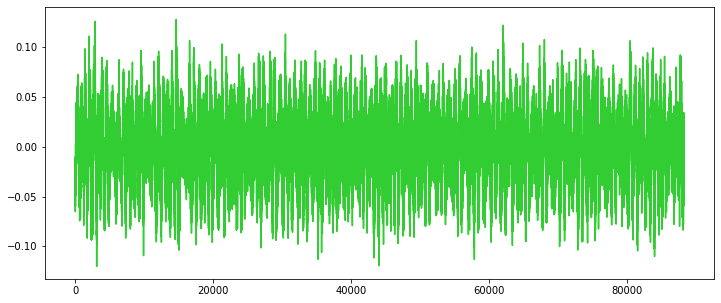

In [22]:
# LET'S PLOT THE LIBROSA AUDIO DATA:

import matplotlib.pyplot as plt

# ORIGINAL AUDIO WITH 1 CHANNEL

plt.figure(figsize = (12,5))
plt.plot(librosa_audio_data, color = 'limegreen')

#this shows how the data is distributed

**Let's see how the 2 channels will look like**

* Here we will use scipy and in scipy we have something called wavfile, In this library when it reads audio file path, it will keep that particular file path in which ever channel it is. So usualy an audio file may have a single channel or it may also have a double channel so a single channel is called as mono and audio file with 2 channels is called as stereo.

* In scipy we have wavfile and this library reads the audio path, it will keep that particular path in whichever channel it is.

In [23]:
#Let's read with scipy :

from scipy.io import wavfile as wav
wave_sample_rate, wave_audio_data = wav.read(audio_file_path)

In [24]:
print(wave_audio_data)

[[-83820544 -82378752]
 [-92340224 -85852160]
 [-85000192 -76087296]
 ...
 [-31784960 -14286848]
 [-38666240 -24576000]
 [-36634624 -63635456]]


**OBSERVATION**

* Here we are having 2 features or 2 Dimensions (2D), so in case of librosa we have only one feature which is normalized between -1 to 1 but here we have 2 channels and with the help of 2 channels we are just checking out that this will be the info that is by default given by this particular wav file. So librosa by default converts that into a mono channel.

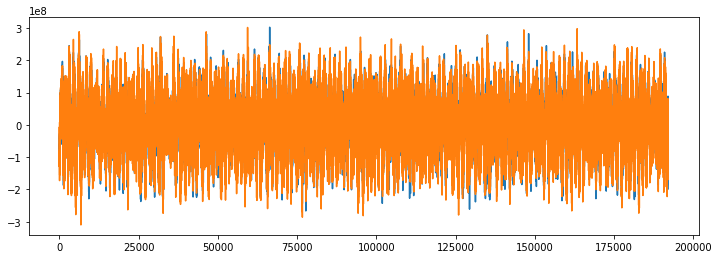

In [25]:
import matplotlib.pyplot as plt

#ORIGINAL AUDIO WITH 2 CHANNELS. 

plt.figure(figsize = (12,4))
plt.plot(wave_audio_data) #This is a stereo channel

* We are getting this type of graph and this is because of 2 channels or stereo channel.

In [2]:
#  We will take these signals and try to create some independent features which will represent that 
# particular audio data 

## Extract Features

* In order to create independent features by taking this mono signal which will be representing the particular audio data and It is the most important task. For this we have a technique called as "Mel-Frequency Cepstral coefficients" (MFCC). This is a heavy technique wrt audio signal processing.

* Here we will be using Mel-Frequency Cepstral Coefficients(MFCC) from the audio samples. The
    MFCC summarises the frequency distribution across the window size, so it is possible to analyse
    both the frequency and time characteristics of the sound. These audio representations will allow
    us to identify features for classification. It will try to convert the audio into some kind of features based on the frequency and time characteristics which will help us to do the classification.


* MFCC does nothing but extracting patterns based on the frequency and time characterstics. This will uniquely able to identify that particular audio signal like in which class it actually belongs to because this audio signal will be later used in  deep learning Techniques.

In [26]:
#All audio signal got converted into array of dimensions (40, 173). so these are the patterns that has been extracted based on 
#the frequency and time characterstics and it will uniquely able to identify that particular audio signal like in which class
#it actually belongs to because this audio signal will be later used in  deep learning Techniques.

In [27]:
mfccs = librosa.feature.mfcc(y = librosa_audio_data, sr = librosa_sample_rate, n_mfcc = 40)
print(mfccs.shape)

(40, 173)


In [28]:
mfccs

array([[-2.3589615e+02, -1.9967941e+02, -1.9970169e+02, ...,
        -1.9267801e+02, -1.9226051e+02, -2.1438763e+02],
       [ 8.2419037e+01,  6.9295792e+01,  7.0409042e+01, ...,
         7.8432823e+01,  8.3999840e+01,  8.0285294e+01],
       [ 2.4053872e-01, -6.6147223e+00, -1.3394619e+01, ...,
        -6.6640816e+00, -2.9161131e+00, -2.3680656e+00],
       ...,
       [-2.0092740e+00, -9.0536714e-01, -4.7097430e+00, ...,
        -2.7339072e+00, -2.8278263e+00, -3.1408513e-01],
       [-3.0876963e+00, -1.3628966e-01, -3.4554789e+00, ...,
        -3.8277990e-01, -2.6447644e+00, -5.3167582e-01],
       [-2.0418744e+00,  2.9160435e+00,  4.7236328e+00, ...,
         2.7138968e+00,  4.3622046e+00,  4.6242037e+00]], dtype=float32)

In [29]:
#There are 8000 files and we need to apply all this particular things to all these files.
#Extracting MFCC's for every audio file.

import pandas as pd
import os
import librosa

audio_dataset_path = 'UrbanSound8K/UrbanSound8K/audio/'
metadata = pd.read_csv('UrbanSound8K/UrbanSound8K/metadata/UrbanSound8K.csv') #  metadata file has the mapping w.r.t the folder and the file name
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


* This feature extractor is a function which takes a file_name and then we are going to use the librosa.load and once we do this it is going to take 2 information i.e. audio and the sample rate then we are going to use 'librosa.feature.mfcc' and we are going to give it different parameters and in order to find out the scaled features, we will be doing a mean on the transpose of the particular value that we are getting. 

* res_type : str
  resample type.
  
  By default, this uses resampy’s high-quality mode (‘kaiser_best’).

In [30]:
def feature_extractor(file):
    
    audio, sample_rate = librosa.load(file_name, res_type = 'kaiser_fast')
    mfccs_features = librosa.feature.mfcc(y = audio, sr = sample_rate, n_mfcc = 40)
    mfccs_scaled_features = np.mean(mfccs_features.T, axis = 0)
    
    return mfccs_scaled_features

**The above function is for 1 audio file and to do it for all the files, we have to iterate over the whole csv file.**

* metadata.iterrows() : It will help us to iterate over all the rows.

In [31]:
#we are just creating independent and dependent features and later on we will be converting this list into a dataframe.

import numpy as np
from tqdm import tqdm
#Now we iterate throgh every audio file and extract features
#using mel-frequency ceptral coefficients
extracted_features = []

for index_num, row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path), 'fold' + str(row['fold']) + '/' , str(row['slice_file_name']))
    final_class_labels = row['class']
    data = feature_extractor(file_name)
    extracted_features.append([data, final_class_labels])
    
# We append it because we will convert this into a dataframe 
# Mel-Frequency Cepstral Coefficients will extract some important information based on frequency
# and time data 

3554it [06:53, 11.12it/s]C:\Users\tanu\anaconda3\envs\tf\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1323
  return f(*args, **kwargs)
8324it [14:26, 14.12it/s]C:\Users\tanu\anaconda3\envs\tf\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1103
  return f(*args, **kwargs)
8328it [14:26, 19.24it/s]C:\Users\tanu\anaconda3\envs\tf\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1523
  return f(*args, **kwargs)
8732it [15:02,  9.68it/s]


* mel-frequency ceptral coefficients : It is going to extract some important info based on frequency and time data. So we can try to extract the features from audio signals so that it will help us to classify these signals.

In [32]:
## converting extracted_features to pandas dataframe

extracted_features_df = pd.DataFrame(extracted_features, columns = ['Features', 'Class'])
extracted_features_df.head()

,Features,Class
0,"[-218.18938, 71.38549, -131.49442, -52.25892, ...",dog_bark
1,"[-425.05234, 110.67095, -54.192833, 62.045406,...",children_playing
2,"[-459.82623, 122.82864, -47.908062, 53.302677,...",children_playing
3,"[-414.82184, 102.94826, -36.65685, 54.170742, ...",children_playing
4,"[-447.60776, 115.08627, -53.74607, 61.55309, 1...",children_playing


* tolist () : used to convert the data elements of an array into a list.

In [33]:
#split the dataset into independent and dependent dataset:

X = np.array(extracted_features_df['Features'].tolist())
Y = np.array(extracted_features_df['Class'].tolist())

In [34]:
X.shape #There are 8732 records

(8732, 40)

In [35]:
X

array([[-218.18938   ,   71.38549   , -131.49442   , ...,   -1.5696381 ,
          -0.7547217 ,    0.5339846 ],
       [-425.05234   ,  110.67095   ,  -54.192833  , ...,    0.63086635,
          -0.6702726 ,    0.59634036],
       [-459.82623   ,  122.82864   ,  -47.908062  , ...,    2.194272  ,
           1.5538614 ,   -0.7991639 ],
       ...,
       [-304.84702   ,  112.69567   ,  -47.21992   , ...,   -3.0244386 ,
           2.6847005 ,    7.674591  ],
       [-345.06885   ,  126.78658   ,  -56.18254   , ...,   -7.8130603 ,
          -1.7661592 ,    5.8158836 ],
       [-316.331     ,   95.86536   ,  -38.176315  , ...,    0.609448  ,
         -11.483956  ,   -5.9417224 ]], dtype=float32)

In [36]:
Y 

array(['dog_bark', 'children_playing', 'children_playing', ...,
       'car_horn', 'car_horn', 'car_horn'], dtype='<U16')

In [37]:
#Label Encoding

Y = np.array(pd.get_dummies(Y)) #Convert categorical variable into dummy/indicator variables.

In [38]:
Y[0] #one hot encoded.

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0], dtype=uint8)

In [39]:
#Train Test split

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state = 0)

In [40]:
x_train# independent features 


array([[-1.3211458e+02,  1.1391494e+02, -2.3927406e+01, ...,
         3.3260243e+00, -1.4790288e+00,  2.8912871e+00],
       [-1.4296137e+01,  9.1951004e+01, -8.6025953e+00, ...,
        -3.3708370e+00, -5.2008624e+00, -1.5975088e+00],
       [-4.9827820e+01,  1.8449357e-01, -2.0364500e+01, ...,
         2.0259936e+00, -8.3159244e-01,  2.7930872e+00],
       ...,
       [-4.2723694e+02,  9.2938095e+01,  2.8287885e+00, ...,
         8.1411356e-01,  6.6066748e-01,  7.8365982e-01],
       [-1.4640692e+02,  1.3716916e+02, -3.4362492e+01, ...,
         1.3839475e+00, -1.9667517e+00, -8.8792086e-01],
       [-4.2171307e+02,  2.1160454e+02,  2.5852380e+00, ...,
        -5.1338639e+00, -3.6135261e+00, -1.3413877e+00]], dtype=float32)

In [41]:
Y # for the independent features y represent our output class 

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]], dtype=uint8)

In [42]:
x_train.shape 

(6985, 40)

In [43]:
x_test.shape

(1747, 40)

In [44]:
y_train.shape

(6985, 10)

In [45]:
y_test.shape  # we have 10 features as we have 10 classes

(1747, 10)

## Model Creation

In [46]:
import tensorflow as tf
print(tf.__version__)

2.8.0


In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [48]:
# No. of classes:

num_labels = Y.shape[1]
num_labels

10

#### Steps



* We will create an Artificial Neural Networks (ANN) with 3 dense layers 

* We give the input shape w.r.t the number of features 

* Then we apply the activation function in the 1st layer 

* Then we will apply our model Dropout to avoid overfitting

* Similarly we create 2 more layers

* Our output layers will be a dense layer of number of classes

* And then we will apply softmax function on output layer as this is a multiclass classification problem

* we are going to create Artificial Neural Networks (ANN) with 3 dense layers.

* input_shape is (40,) for first dense layer because in our training dataset we have 40 features so we usually give input shape wrt the no. of features.

* why dropout is actually used : To avoid overfitting.

Dense()

In [49]:
model = Sequential()

#first layer :

model.add(Dense(100, input_shape = (40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))

#Second layer :

model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))

#Third layer :

model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

#final layer :

model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [50]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               4100      
                                                                 
 activation (Activation)     (None, 100)               0         
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 200)               20200     
                                                                 
 activation_1 (Activation)   (None, 200)               0         
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               2

In [51]:
model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer = 'adam')

**ModelCheckpoint:**
* Callback to save the Keras model or model weights at some frequency. ModelCheckpoint callback is used in conjunction with training using model.fit() to save a model or weights (in a checkpoint file) at some interval, so the model or weights can be loaded later to continue the training from the state saved.

**save_best_only:**

* if save_best_only=True, it only saves when the model is considered the "best" and the latest best model according to the quantity monitored will not be overwritten. 

**datetime:**
* The datetime module supplies classes for manipulating dates and times.

* While date and time arithmetic is supported, the focus of the implementation is on efficient attribute extraction for output formatting and manipulation.

**HDF is an acronym for Hierarchical Data Format. HDF5 is HDF Version 5.**

#### Training my model

In [54]:
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath = 'UrbanSound8K/UrbanSound8K/audio_classification.hdf5',
                             verbose = 1, save_best_only = True)
start = datetime.now()

model.fit(x_train, y_train, batch_size = num_batch_size, epochs = num_epochs, validation_data = (x_test, y_test), 
          callbacks = [checkpointer])

duration = datetime.now() - start
print('Training completed in time : ', duration)

Epoch 1/100
215/219 [============================>.] - ETA: 0s - loss: 0.9654 - accuracy: 0.6807
Epoch 1: val_loss improved from inf to 0.77098, saving model to UrbanSound8K/UrbanSound8K\audio_classification.hdf5
219/219 [==============================] - 1s 5ms/step - loss: 0.9674 - accuracy: 0.6800 - val_loss: 0.7710 - val_accuracy: 0.7476
Epoch 2/100
214/219 [============================>.] - ETA: 0s - loss: 0.9645 - accuracy: 0.6814
Epoch 2: val_loss did not improve from 0.77098
219/219 [==============================] - 1s 4ms/step - loss: 0.9654 - accuracy: 0.6813 - val_loss: 0.8035 - val_accuracy: 0.7441
Epoch 3/100
212/219 [============================>.] - ETA: 0s - loss: 0.9491 - accuracy: 0.6788
Epoch 3: val_loss improved from 0.77098 to 0.74875, saving model to UrbanSound8K/UrbanSound8K\audio_classification.hdf5
219/219 [==============================] - 1s 5ms/step - loss: 0.9490 - accuracy: 0.6785 - val_loss: 0.7487 - val_accuracy: 0.7665
Epoch 4/100
209/219 [============

Epoch 58/100
219/219 [==============================] - ETA: 0s - loss: 0.8859 - accuracy: 0.7108
Epoch 58: val_loss did not improve from 0.69440
219/219 [==============================] - 2s 9ms/step - loss: 0.8859 - accuracy: 0.7108 - val_loss: 0.7146 - val_accuracy: 0.7733
Epoch 59/100
214/219 [============================>.] - ETA: 0s - loss: 0.9045 - accuracy: 0.7047
Epoch 59: val_loss did not improve from 0.69440
219/219 [==============================] - 2s 8ms/step - loss: 0.9048 - accuracy: 0.7039 - val_loss: 0.7109 - val_accuracy: 0.7768
Epoch 60/100
209/219 [===========================>..] - ETA: 0s - loss: 0.8733 - accuracy: 0.7167
Epoch 60: val_loss did not improve from 0.69440
219/219 [==============================] - 1s 5ms/step - loss: 0.8818 - accuracy: 0.7151 - val_loss: 0.7449 - val_accuracy: 0.7607
Epoch 61/100
209/219 [===========================>..] - ETA: 0s - loss: 0.9190 - accuracy: 0.7036
Epoch 61: val_loss did not improve from 0.69440
219/219 [==============

Epoch 87/100
211/219 [===========================>..] - ETA: 0s - loss: 0.8811 - accuracy: 0.7143
Epoch 87: val_loss did not improve from 0.68675
219/219 [==============================] - 1s 7ms/step - loss: 0.8814 - accuracy: 0.7140 - val_loss: 0.6969 - val_accuracy: 0.7831
Epoch 88/100
209/219 [===========================>..] - ETA: 0s - loss: 0.8759 - accuracy: 0.7083
Epoch 88: val_loss did not improve from 0.68675
219/219 [==============================] - 1s 5ms/step - loss: 0.8800 - accuracy: 0.7069 - val_loss: 0.6984 - val_accuracy: 0.7882
Epoch 89/100
211/219 [===========================>..] - ETA: 0s - loss: 0.8654 - accuracy: 0.7171
Epoch 89: val_loss did not improve from 0.68675
219/219 [==============================] - 1s 6ms/step - loss: 0.8682 - accuracy: 0.7158 - val_loss: 0.6921 - val_accuracy: 0.7768
Epoch 90/100
209/219 [===========================>..] - ETA: 0s - loss: 0.8706 - accuracy: 0.7084
Epoch 90: val_loss improved from 0.68675 to 0.68423, saving model to Ur

In [55]:
test_accuracy = model.evaluate(x_test, y_test, verbose = 0)
print(str(test_accuracy[1] * 100) + ' %')

78.82083654403687 %


In [ ]:
# prediction_features : This func will help us to get the features from the func 'feature_extractor'

In [66]:
filename = 'UrbanSound8K/UrbanSound8K/dog_bark.wav'
prediction_features = feature_extractor(filename)
prediction_features = prediction_features.reshape(1,-1)
print(prediction_features.shape)

model.predict(prediction_features) # use model.predict() to extract the class probabilities. 

(1, 40)


array([[1.4118507e-04, 3.8113284e-01, 3.8165185e-03, 3.6328673e-02,
        3.3742657e-03, 1.9388609e-03, 2.2275232e-04, 5.8950078e-05,
        6.5466610e-04, 5.7233125e-01]], dtype=float32)

In [80]:
#array[9] is basically the values that are present in our classes

predictions = np.argmax(model.predict(prediction_features), axis = -1)
predictions

array([9], dtype=int64)

In [81]:
predictions = np.argmax(model.predict(prediction_features))
predictions # it has predicted 9th class for us

9

In [84]:
#to check the numbers corresponding to different classes:

metadata['class'].unique()

array(['dog_bark', 'children_playing', 'car_horn', 'air_conditioner',
       'street_music', 'gun_shot', 'siren', 'engine_idling', 'jackhammer',
       'drilling'], dtype=object)

## Testing Some Test Audio Data

* we have created an ANN model and we have trained that specific model for the audio classification and there we got 78.82 % of  validation accuracy which is pretty much good.


* we have extracted information from the audio with the help of MFCC.

#### Testing steps

* Preprocess the new audio data : First of all we need a new audio file and we again need to preprocess the audio data wherein we need to extract the features from that specific data itself with the help of MFCC.


* Predict the classes : We need to predict the class labels with the help of model that we have created over here and it will actually give us the label.


* Inverse Transform your Predicted Label : We will try to inverse transform the labels in order to get the class names.

In [ ]:
#we were using get_dummies to  do the label encoding wrt the output features but whenever we want to work well with the test 
#data, we need to inverse transform from that label to the class name and for that we will be using label encoder.

#Our initial y was the class_names and first of of all the LabelEncoder.fit_transform(Y) will convert the class_names to class
#labels like, 0, 1,2....9 and total no. of classes are 10 after that we convert those labels to to_categorical that means we
#will be getting dummy variables wrt the no. of features. We are doing this because the same LableEncoder we will be using with 
#the test data.

In [85]:
Y #get_dummies (Y)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]], dtype=uint8)

In [88]:
X = np.array(extracted_features_df['Features'].tolist())
Y = np.array(extracted_features_df['Class'].tolist())

In [94]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

y = to_categorical(labelencoder.fit_transform(Y))


In [95]:
y #we are getting all the dummy encoded values.

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

* we are taking some test data like audios of : dog_bark, siren, gunshot, drilling

#### Points

In [ ]:
#The filename is in the form of wav that basically means it is an audio file
# we are getting the audio and the sample rates
# Then we are applying mffc to get the features
# For one audio file, we are going to reshape it to (1, -1) and it denotes 1 row with 40 features of value
# Then we are predicting the labels, labels means to which label it belongs to whether it is 0,1,2 or to which class it belongs 
#to.

#Then to get the class name, we are going to do the inverse transform of our labels and we have used the label encoder instead
#of using get_dummies.

#finally we get the predicted class.

#### Test_Case -1

In [106]:
# code :

filename = 'UrbanSound8K/UrbanSound8K/Dog_bark_audio.wav'
audio, sample_rate = librosa.load(filename, res_type = 'kaiser_fast')
mfccs_features = librosa.feature.mfcc(y = audio, sr = sample_rate, n_mfcc = 40)
mfccs_scaled_features = np.mean(mfccs_features.T, axis = 0)

print(mfccs_scaled_features)
mfccs_scaled_features = mfccs_scaled_features.reshape(1,-1) #here we have 1 row and 40 features
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape) #we have 40 features with 1 row of all those features

predicted_labels = np.argmax(model.predict(mfccs_scaled_features), axis = -1)
print(predicted_labels) #here we are getting the label
prediction_class = labelencoder.inverse_transform(predicted_labels)
print(prediction_class)

[-3.96426971e+02  1.35891617e+02 -9.07447243e+00 -1.29572134e+01
 -3.19989014e+00 -7.81455874e-01 -1.00101185e+01  4.18696213e+00
 -7.58271888e-02 -2.75464392e+00  3.56749916e+00  4.98040581e+00
  8.77176094e+00  1.25224867e+01  1.33599567e+00  3.71207356e-01
  2.53297710e+00  8.23404884e+00  1.83606100e+00 -7.33136177e+00
 -2.28533316e+00  1.46139646e+00  4.94687128e+00  8.25885582e+00
  3.79775071e+00  4.18274291e-02 -9.32322800e-01  5.25841676e-03
 -2.75919008e+00 -3.46358180e+00  1.92737770e+00  3.75179434e+00
  4.05397749e+00  3.37514472e+00  4.80203676e+00  1.91332042e+00
 -1.07877299e-01 -1.65648854e+00  6.36762559e-01  1.13236904e+00]
[[-3.96426971e+02  1.35891617e+02 -9.07447243e+00 -1.29572134e+01
  -3.19989014e+00 -7.81455874e-01 -1.00101185e+01  4.18696213e+00
  -7.58271888e-02 -2.75464392e+00  3.56749916e+00  4.98040581e+00
   8.77176094e+00  1.25224867e+01  1.33599567e+00  3.71207356e-01
   2.53297710e+00  8.23404884e+00  1.83606100e+00 -7.33136177e+00
  -2.28533316e+00  

#### Test_Case -2

#### check for another file since there is 78.8% accuracy so few predictions might be wrong:

In [107]:

# code :

filename = 'UrbanSound8K/UrbanSound8K/Gunshot.wav'
audio, sample_rate = librosa.load(filename, res_type = 'kaiser_fast')
mfccs_features = librosa.feature.mfcc(y = audio, sr = sample_rate, n_mfcc = 40)
mfccs_scaled_features = np.mean(mfccs_features.T, axis = 0)

print(mfccs_scaled_features)
mfccs_scaled_features = mfccs_scaled_features.reshape(1,-1) #here we have 1 row and 40 features
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape) #we have 40 features with 1 row of all those features

predicted_labels = np.argmax(model.predict(mfccs_scaled_features), axis = -1)
print(predicted_labels) #here we are getting the labels
prediction_class = labelencoder.inverse_transform(predicted_labels)
print(prediction_class)

[-1.25093842e+02  9.80022888e+01 -4.54499274e-01  3.19896736e+01
 -1.54852068e+00  3.48417244e+01 -5.97087097e+00  2.10695000e+01
 -1.59718523e+01  2.21672630e+01 -8.14881420e+00  9.22061443e+00
 -1.62443275e+01  4.96041822e+00 -8.97072315e+00  1.04837446e+01
 -5.55056906e+00  1.18055525e+01 -5.71004915e+00  5.76108789e+00
 -5.27282119e-01  5.08898258e+00 -6.96648788e+00  3.28440619e+00
 -4.50012541e+00  4.26229429e+00 -4.49791002e+00  3.42958307e+00
 -7.41595149e-01  3.32954645e+00  3.57477260e+00  3.29735303e+00
  9.21380445e-02  3.50831103e+00 -3.59949052e-01  2.98326993e+00
 -4.83822870e+00 -7.00331151e-01 -3.65114355e+00 -2.97455162e-01]
[[-1.25093842e+02  9.80022888e+01 -4.54499274e-01  3.19896736e+01
  -1.54852068e+00  3.48417244e+01 -5.97087097e+00  2.10695000e+01
  -1.59718523e+01  2.21672630e+01 -8.14881420e+00  9.22061443e+00
  -1.62443275e+01  4.96041822e+00 -8.97072315e+00  1.04837446e+01
  -5.55056906e+00  1.18055525e+01 -5.71004915e+00  5.76108789e+00
  -5.27282119e-01  

#### Test_Case -3

In [108]:
filename = 'UrbanSound8K/UrbanSound8K/children_playing.wav'
audio, sample_rate = librosa.load(filename, res_type = 'kaiser_fast')
mfccs_features = librosa.feature.mfcc(y = audio, sr = sample_rate, n_mfcc = 40)
mfccs_scaled_features = np.mean(mfccs_features.T, axis = 0)

print(mfccs_scaled_features)
mfccs_scaled_features = mfccs_scaled_features.reshape(1,-1) #here we have 1 row and 40 features
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape) #we have 40 features with 1 row of all those features

predicted_labels = np.argmax(model.predict(mfccs_scaled_features), axis = -1)
print(predicted_labels) #here we are getting the labels
prediction_class = labelencoder.inverse_transform(predicted_labels)
print(prediction_class)

[-2.1828964e+02  1.1025578e+02 -5.0515923e+01  5.0861385e+01
 -3.8631561e+00  2.4410366e+01 -8.3895054e+00  9.5032597e+00
  1.6781569e+00  1.1073964e+01  2.6267178e+00  1.8960251e+01
  6.3756132e+00  5.6419859e+00 -2.4545786e+00  8.7158594e+00
  4.2493691e+00  6.6573749e+00  1.5675004e+00  1.9886049e+00
 -7.3186839e-01  5.3475537e+00  4.0827761e+00  2.6539235e+00
 -1.2824837e+00  1.7673811e+00 -1.5928531e-01  2.3087564e+00
  9.5006621e-01  1.1799718e+00 -1.7781608e+00  6.3699335e-01
  1.7129006e-02  6.9487751e-02 -2.8608034e+00 -2.2741487e+00
 -1.5677410e+00 -4.7379991e-01 -1.6746978e+00 -5.1785386e-01]
[[-2.1828964e+02  1.1025578e+02 -5.0515923e+01  5.0861385e+01
  -3.8631561e+00  2.4410366e+01 -8.3895054e+00  9.5032597e+00
   1.6781569e+00  1.1073964e+01  2.6267178e+00  1.8960251e+01
   6.3756132e+00  5.6419859e+00 -2.4545786e+00  8.7158594e+00
   4.2493691e+00  6.6573749e+00  1.5675004e+00  1.9886049e+00
  -7.3186839e-01  5.3475537e+00  4.0827761e+00  2.6539235e+00
  -1.2824837e+00 

#### Conclusion 

* This project is able to give us some good accuracy